In [2]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [6]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [7]:
y.index = y.name

In [8]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [9]:
y.index = pd.to_datetime(y.index)

In [10]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [11]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [12]:
from pytrends.request import TrendReq

In [62]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["M1", "Covid", "Apple Watch", "Vision Pro","MacBook","Tim Cook","Boardway", "Spider Man","Lasso"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [63]:
df = df.resample("Q").mean()
df

,M1,Covid,Apple Watch,Vision Pro,MacBook,Tim Cook,Boardway,Spider Man,Lasso
date,,,,,,,,,
2004-03-31,34.000000,0.000000,0.000000,6.333333,0.000000,1.666667,29.000000,2.666667,4.666667
2004-06-30,31.000000,0.000000,0.000000,5.666667,0.000000,1.666667,63.666667,4.000000,4.333333
2004-09-30,30.000000,0.000000,0.000000,6.333333,0.000000,3.333333,93.333333,8.000000,4.333333
2004-12-31,33.000000,0.000000,0.000000,7.000000,0.000000,1.666667,71.666667,3.000000,4.333333
2005-03-31,30.666667,0.000000,0.000000,6.666667,0.000000,2.666667,56.333333,2.333333,4.000000
...,...,...,...,...,...,...,...,...,...
2023-03-31,71.666667,7.666667,65.333333,3.000000,75.000000,13.333333,21.333333,7.000000,40.333333
2023-06-30,66.666667,5.333333,63.000000,35.333333,68.666667,20.333333,21.666667,17.333333,86.333333
2023-09-30,70.333333,5.666667,71.333333,11.333333,78.000000,14.666667,26.000000,13.333333,37.666667


In [64]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()
temp

,BasicEPS,M1,Covid,Apple Watch,Vision Pro,MacBook,Tim Cook,Boardway,Spider Man,Lasso
2004-03-31,0.002,34.000000,0.000000,0.000000,6.333333,0.000000,1.666667,29.000000,2.666667,4.666667
2004-06-30,0.003,31.000000,0.000000,0.000000,5.666667,0.000000,1.666667,63.666667,4.000000,4.333333
2004-09-30,0.0,30.000000,0.000000,0.000000,6.333333,0.000000,3.333333,93.333333,8.000000,4.333333
2004-12-31,0.013,33.000000,0.000000,0.000000,7.000000,0.000000,1.666667,71.666667,3.000000,4.333333
2005-03-31,0.013,30.666667,0.000000,0.000000,6.666667,0.000000,2.666667,56.333333,2.333333,4.000000
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1.29,80.333333,20.333333,77.666667,4.000000,83.000000,14.000000,22.666667,11.000000,33.333333
2022-12-31,1.89,89.666667,13.666667,82.333333,3.000000,77.333333,18.333333,21.333333,8.333333,30.333333
2023-03-31,1.53,71.666667,7.666667,65.333333,3.000000,75.000000,13.333333,21.333333,7.000000,40.333333
2023-06-30,1.27,66.666667,5.333333,63.000000,35.333333,68.666667,20.333333,21.666667,17.333333,86.333333


# 3.) Normalize all the X data

In [20]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [22]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso(alpha = .5)
model = lasso.fit(X_scaled, y)
dir(model)
coefficients = model.coef_

In [67]:
coefficients

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.])

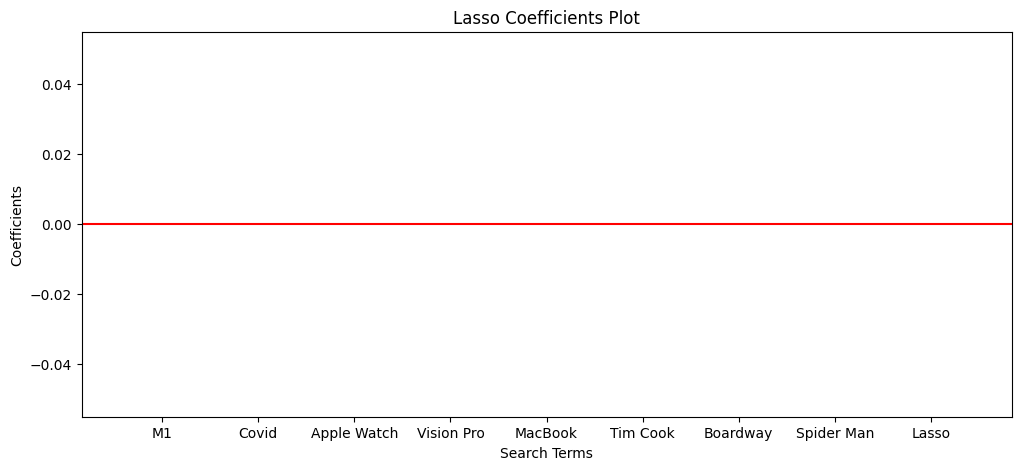

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.xlabel('Search Terms')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients Plot')
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

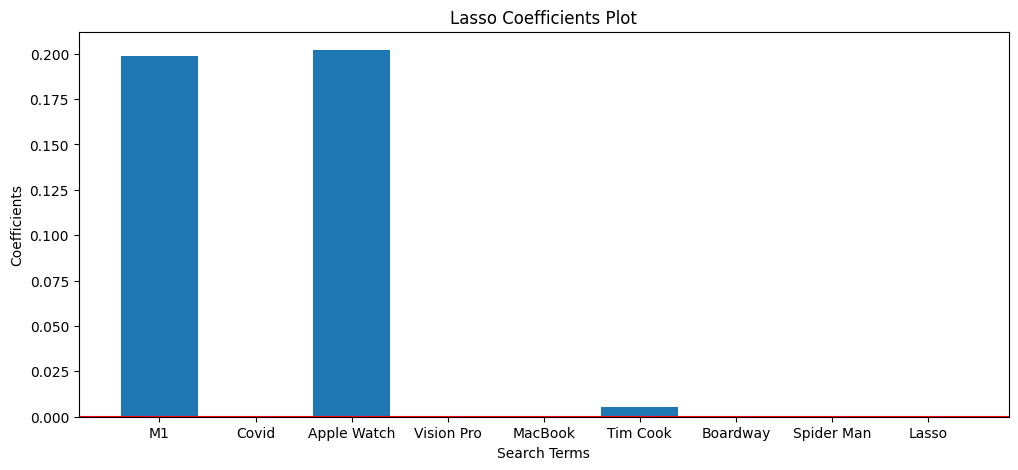

In [69]:
lasso = Lasso(alpha = .1)
model = lasso.fit(X_scaled, y)
dir(model)
coefficients = model.coef_

plt.figure(figsize = (12,5))
plt.xlabel('Search Terms')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients Plot')
plt.bar(range(len(coefficients)), coefficients, tick_label=X.columns)
plt.axhline(0, color = "red")
plt.show()

When I set alpha equals to 0.5, all coefficients were shrank to 0, including the related terms and unrelated ters. This situation occurs partly because that we choosed high alpha 0.5, which will have more penalty on the coefficients. It may also implied that all the terms may not be very strong predictors.

So I run another Lasso regression using alpha as 0.1, and I get 3 non-zero coefficients: M1, Apple Watch and Tim Cook, which are all from the search terms I think could nowcast earnings. M1 and Apple Watch seems stronger than others in nowcasting earnings. All the terms that I think could not nowcast (Boardway, Spider Man, Lasso) were shrank into 0. 

The coefficients do magnitudes make some sense.